In [3]:
import sys
print(sys.version)
import json
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt


3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


In [124]:
# TODO: Choose color palette https://seaborn.pydata.org/tutorial/color_palettes.html
MAIN_COLOR_1 = "#7D92C3"
MAIN_COLOR_2 = "#4664AA"
ACCENT_COLOR = "#902020"
# TODO: Figure aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set(color_codes=True)

run = "politician_breadth"
res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
classes = list(res.index.values)

res

,m,connected,bipartite,n_t,n_b,density,k_t,k_b,m_t,n_t_om,...,m_b,n_b_om,density_b,k_b_om,rc_t_density,rc_t_ncomponents,rc_t_slcc,rc_b_density,rc_b_ncomponents,rc_b_slcc
Politician,3054862.0,False,True,148459.0,7118.0,0.002891,20.577143,429.174206,9.475765e+09,148459.0,...,502293.0,7118.0,0.019830,141.133183,0.001000,NaN,NaN,0.000011,0.002411,0.002680
Ambassador,149891.0,False,True,7570.0,1037.0,0.019094,19.800661,144.542912,2.464336e+07,7570.0,...,46645.0,1037.0,0.086835,90.048263,0.006405,0.015999,0.017823,0.000497,0.017799,0.017604
Chancellor,2283.0,True,True,80.0,141.0,0.202394,28.537500,16.191489,1.840000e+03,80.0,...,3674.0,141.0,0.372239,54.429630,0.100442,0.180178,0.177664,0.043374,0.195089,0.194821
Congressman,120606.0,True,True,3466.0,380.0,0.091571,34.796884,317.384211,5.997158e+06,3466.0,...,23100.0,380.0,0.320789,121.578947,0.059686,0.088790,0.088340,0.008850,0.088768,0.088700
Governor,84072.0,True,True,2711.0,567.0,0.054694,31.011435,148.275132,3.668100e+06,2711.0,...,33282.0,567.0,0.207415,117.396825,0.032372,0.052680,0.052619,0.003218,0.052492,0.052442
Lieutenant,31117.0,False,True,1665.0,647.0,0.028885,18.688889,48.094281,1.269188e+06,1665.0,...,23107.0,647.0,0.110570,71.538700,0.011224,0.017313,0.026461,0.001067,0.027114,0.026926
Mayor,287903.0,False,True,13705.0,1797.0,0.011690,21.007151,160.213133,8.272774e+07,13705.0,...,114871.0,1797.0,0.071185,127.918708,0.004664,NaN,NaN,0.000180,0.010964,0.010901
MemberOfParliament,193275.0,True,True,7087.0,487.0,0.056000,27.271765,396.868583,2.501537e+07,7087.0,...,25094.0,487.0,0.212048,103.055441,0.027421,0.054108,0.054030,0.003455,0.053749,0.053738
President,317845.0,False,True,13907.0,4329.0,0.005280,22.855037,73.422268,8.282560e+07,13907.0,...,290375.0,4329.0,0.030997,134.184381,0.001602,NaN,NaN,0.000037,0.004465,0.004886
PrimeMinister,44166.0,True,True,1458.0,368.0,0.082316,30.292181,120.016304,1.062040e+06,1458.0,...,18316.0,368.0,0.271236,99.543478,0.049129,0.078569,0.078299,0.007085,0.079286,0.079234


/home/david/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


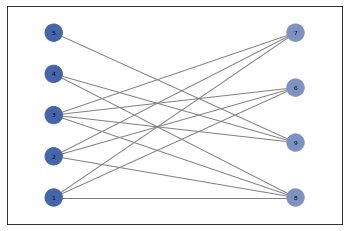

In [4]:
G = nx.Graph()
G.add_edges_from([(1,6),(1,7),(1,8),(2,6),(2,7),(2,8),(3,6),(3,7),(3,8),(3,9),(4,8),(4,9),(5,9)])

coloring = nx.greedy_color(G, strategy="largest_first")
nodecolors = []
for node in G.nodes():
    if coloring[node] == 0:
        nodecolors.append(MAIN_COLOR_1)
    else:
        nodecolors.append(MAIN_COLOR_2)

top = nx.bipartite.sets(G)[0]
bi_layout = nx.bipartite_layout(G, top, aspect_ratio=0.5, scale=0.2)
nx.draw_networkx(G, bi_layout, with_labels=True, font_size=6,node_color=nodecolors, edge_color="grey")


7370 nodes with degree >= 1 and 3.0 disconnected nodes


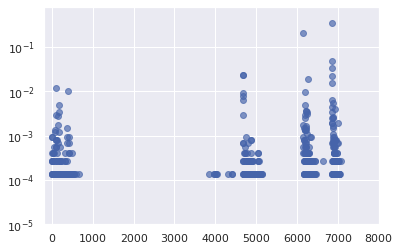

In [11]:
class1 = classes[0]
with open(f"out/{class1}/{class1}.t.k.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    nnodes += value

n_t = res.loc[class1, "n_t"]
ndiscnodes = n_t - nnodes

x = []
y = []
for key, value in dist.items():
    x.append(int(key))
    y.append(float(value / nnodes))
    
print(f"{nnodes} nodes with degree >= 1 and {ndiscnodes} disconnected nodes")
x.append(0)
y.append(float(ndiscnodes / nnodes))

# plt.xscale("log")
plt.xlim(-200, 8000)
plt.yscale("log")
plt.ylim(0.00001, 0.8)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")

6235 nodes with degree >= 1 and 0.0 disconnected nodes


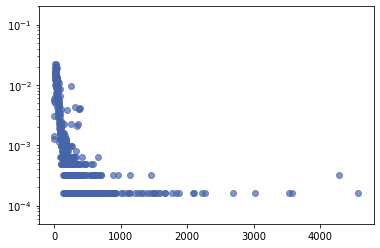

In [10]:
with open(f"out/{classes[0]}/{classes[0]}.b.k.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    nnodes += value

n_b = res.loc[classes[0], "n_b"]
ndiscnodes = n_b - nnodes

x = []
y = []
for key, value in dist.items():
    x.append(int(key))
    y.append(float(value / nnodes))
    
print(f"{nnodes} nodes with degree >= 1 and {ndiscnodes} disconnected nodes")
x.append(0)
y.append(float(ndiscnodes / nnodes))

# plt.xscale("log")
# plt.xlim(0.5, 50000)
plt.yscale("log")
plt.ylim(0.00005, 0.2)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")
plt.show()

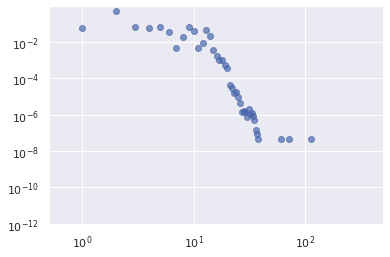

In [12]:
with open(f"out/{classes[0]}/{classes[0]}.t.w.json", "r") as input_file:
    dist = json.load(input_file)

nnodes = 0
for key, value in dist.items():
    if int(key) > 0:
        nnodes += value

x = []
y = []
for key, value in dist.items():
    if int(key) > 0:
        x.append(int(key))
        y.append(float(value / nnodes))

plt.xscale("log")
plt.xlim(0.5, 500)
plt.yscale("log")
plt.ylim(0.000000000001, 0.9)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")
plt.show()

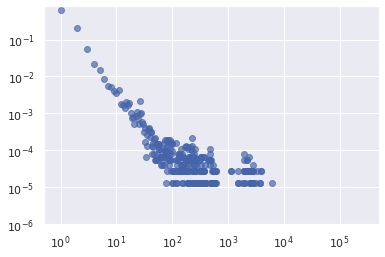

In [13]:
with open(f"out/{classes[0]}/{classes[0]}.b.w.json", "r") as input_file:
    dist = json.load(input_file)

sum = 0
for key, value in dist.items():
    if int(key) > 0:
        sum += value

x = []
y = []
for key, value in dist.items():
    if int(key) > 0:
        x.append(int(key))
        y.append(float(value / sum))

plt.xscale("log")
plt.xlim(0.5, 500000)
plt.yscale("log")
plt.ylim(0.000001, 0.8)
plt.scatter(x, y, color=MAIN_COLOR_2+"aa")
plt.show()

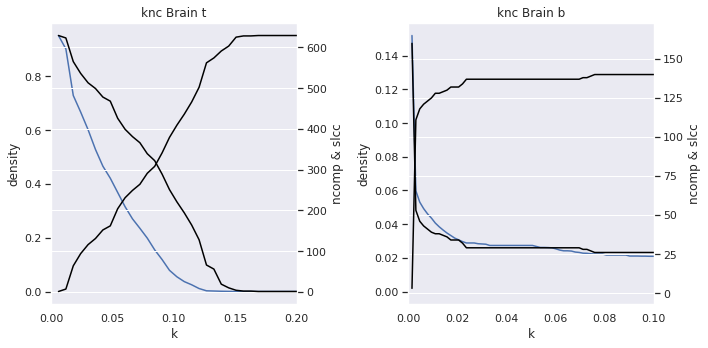

In [110]:
class1 = classes[3]

df_t = pd.read_csv(f"out/{class1}/{class1}.t.knc.csv", index_col=0)
df_b = pd.read_csv(f"out/{class1}/{class1}.b.knc.csv", index_col=0)

n_t = res.loc[class1, "n_t"]
n_b = res.loc[class1, "n_b"]
k_max_t = n_b
k_max_b = n_t
# w_max_t = 50


knc_density = df["density"]
knc_ncomponents = df["ncomponents"] # (n_t - df["ncomponents"]) / (n_t - 1)
knc_slcc = df["slcc"] # (df["slcc"] - 1) / (n_t - 1)
# plt.xlim(0, w_max_t/k_max_t)
# plt.ylim(0, 1)
# plt.bar(df["k"]/k_max_t, knc_ncomponents, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)

# plt.bar(df["k"]/k_max_t, knc_slcc, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)
# ax = df["ncomponents"].plot()
# df["slcc"].plot(ax=ax)

df_t.index = df_t.index / k_max_t # Normalize k axis
df_b.index = df_b.index / k_max_b
# barwidth = 1 / k_max_t

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
df_t["density"].plot(ax=ax1, color="b", title=f"knc {class1} t") # .bar(width=barwidth, align="center") # kind="bar" # bar width not scaling with xlim
df_t["ncomponents"].plot(ax=ax1, color="#000000", secondary_y=True)
df_t["slcc"].plot(ax=ax1, color="#000000", secondary_y=True)
ax1.set_xlim(0, 0.2)
ax1.set_ylabel("density")
ax1.right_ax.set_ylabel("ncomp & slcc")

df_b["density"].plot(ax=ax2, color="b", title=f"knc {class1} b") # .bar(width=barwidth, align="center") # kind="bar" # bar width not scaling with xlim
df_b["ncomponents"].plot(ax=ax2, color="#000000", secondary_y=True)
df_b["slcc"].plot(ax=ax2, color="#000000", secondary_y=True)
ax2.set_xlim(0, 0.1)
ax2.set_ylabel("density")
ax2.right_ax.set_ylabel("ncomp & slcc")

fig.tight_layout() # plt.subplots_adjust(wspace=1)

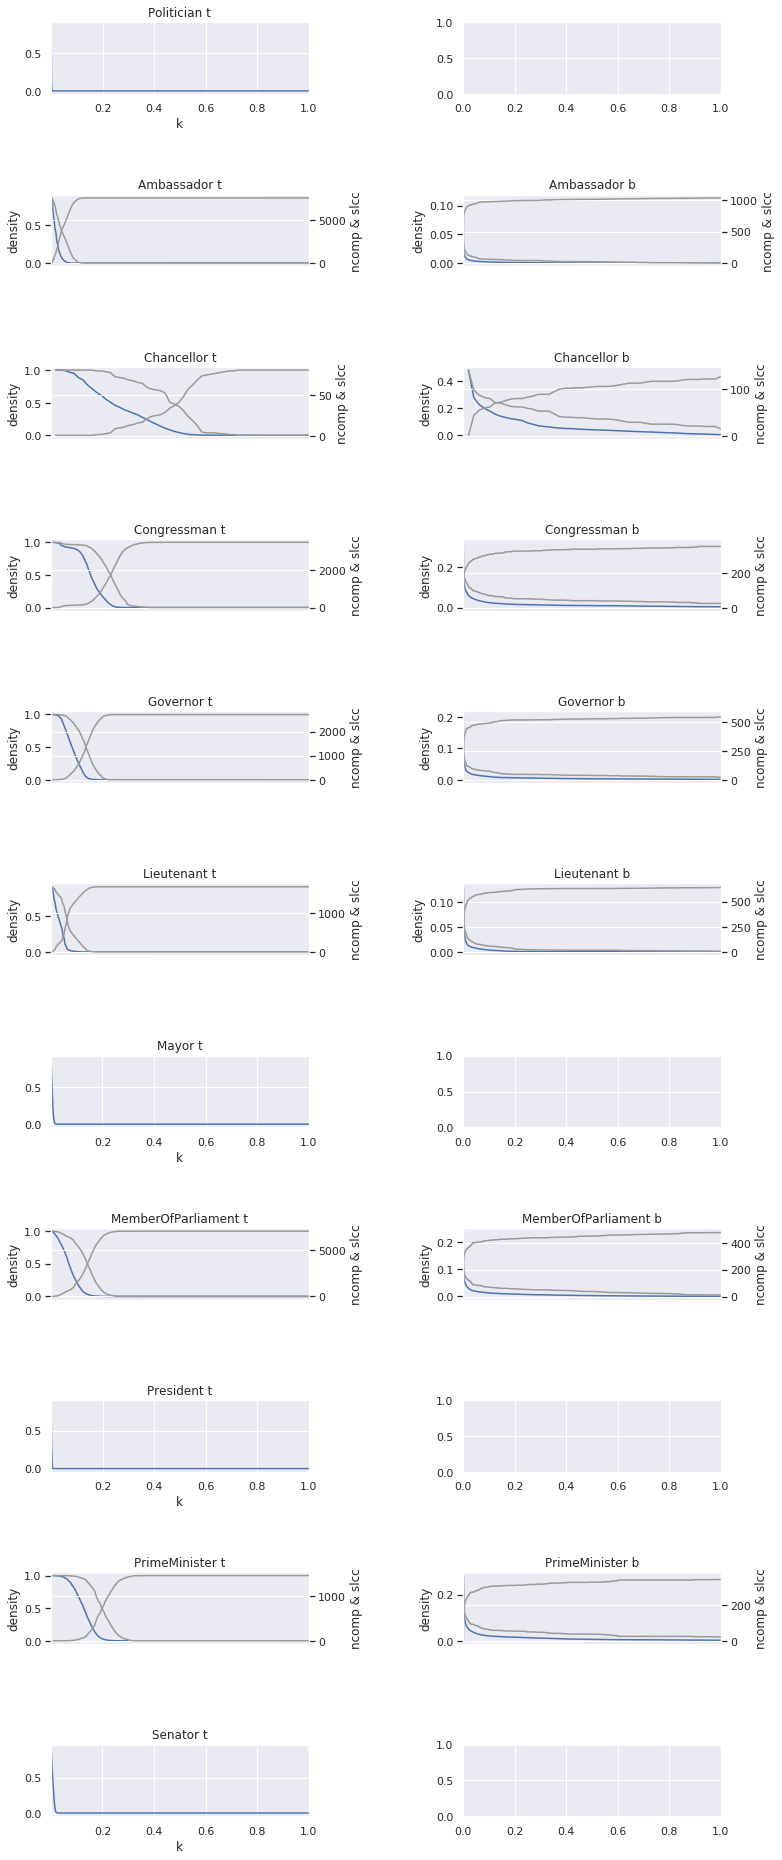

In [130]:
fig, axes = plt.subplots(len(classes), 2, figsize=(12, 3 * len(classes)))

for classname in classes:
    df_t = pd.read_csv(f"out/{classname}/{classname}.t.knc.csv", index_col=0)
    df_b = pd.read_csv(f"out/{classname}/{classname}.b.knc.csv", index_col=0)

    n_t = res.loc[classname, "n_t"]
    n_b = res.loc[classname, "n_b"]

    df_t.index = df_t.index / n_b # Normalize k axis
    df_b.index = df_b.index / n_t

    try:
        axnr = classes.index(classname)
        df_t["density"].plot(ax=axes[axnr][0], color="b", title=f"{classname} t") # .bar(width=barwidth, align="center") # bar width not scaling with xlim
        df_t["ncomponents"].plot(ax=axes[axnr][0], color="#999999", secondary_y=True)
        df_t["slcc"].plot(ax=axes[axnr][0], color="#999999", secondary_y=True)
        axes[axnr][0].set_xlim(0, 0.4)
        axes[axnr][0].set_ylabel("density")
        axes[axnr][0].right_ax.set_ylabel("ncomp & slcc")

        df_b["density"].plot(ax=axes[axnr][1], color="b", title=f"{classname} b") # .bar(width=barwidth, align="center") # bar width not scaling with xlim
        df_b["ncomponents"].plot(ax=axes[axnr][1], color="#999999", secondary_y=True)
        df_b["slcc"].plot(ax=axes[axnr][1], color="#999999", secondary_y=True)
        axes[axnr][1].set_xlim(0, 0.6)
        axes[axnr][1].set_ylabel("density")
        axes[axnr][1].right_ax.set_ylabel("ncomp & slcc")
    except KeyError as e:
        pass
    except FileNotFoundError as e:
        print(classname, e)

# fig.tight_layout()
plt.subplots_adjust(wspace=0.6, hspace=1.4)

<BarContainer object of 2458 artists>

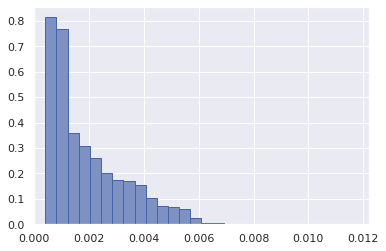

In [112]:
class1 = classes[0]
df = pd.read_csv(f"out/{class1}/{class1}.t.knc.csv")

n_t = res.loc[class1, "n_t"]
n_b = res.loc[class1, "n_b"]
k_max_t = n_b
w_max_t = 30

knc_density = df["density"]
# knc_ncomponents = (n_b - df["ncomponents"]) / (n_b - 1)
# knc_slcc = (df["slcc"] - 1) / (n_b -1)

plt.xlim(0, w_max_t/k_max_t)
# plt.ylim(0, 1)
plt.bar(df["k"]/k_max_t, knc_density, width=1/k_max_t, align="edge", color=MAIN_COLOR_1, edgecolor=MAIN_COLOR_2)


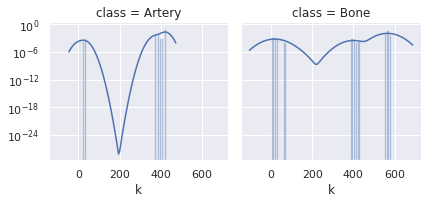

In [16]:
class0 = classes[1]
class1 = classes[2]
with open(f"out/{class0}/{class0}.t.k.json", "r") as input_file:
    dist0 = json.load(input_file)
with open(f"out/{class1}/{class1}.t.k.json", "r") as input_file:
    dist1 = json.load(input_file)

c = []
m = []
k = []
for key, value in dist0.items():
    for _ in range(0, value):
        c.append(class0)
        m.append("t")
        k.append(key)
for key, value in dist1.items():
    for _ in range(0, value):
        c.append(class1)
        m.append("t")
        k.append(key)
dict = {"class": c, "om": m, "k": k}
df = pd.DataFrame(dict)
# sns.distplot(k)

fg = sns.FacetGrid(df, col="class")
fg.map(sns.distplot, "k")
fg.set(yscale="log")